# Exploratory Data Analysis and Predictions of My Movie Ratings
**Data:** my own movie ratings of 499 movies, exported from IMDb

**Objective:** To learn more about my taste in movies (what genre's do I watch the most of, what directors do I like the best, what is my distribution of ratings...etc) and be able to predict how I would rate a movie 

**Resources:** https://www.kaggle.com/kenjee/titanic-project-example

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-ratings/ratings (1).csv


In [3]:
# Load data
all_data = pd.read_csv('/kaggle/input/my-ratings/ratings (1).csv', encoding='latin1')
%matplotlib inline
all_data.columns

Index(['Const', 'Your Rating', 'Date Rated', 'Title', 'URL', 'Title Type',
       'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes',
       'Release Date', 'Directors'],
      dtype='object')

In [4]:
#look at data types and null value counts
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           499 non-null    object 
 1   Your Rating     499 non-null    int64  
 2   Date Rated      499 non-null    object 
 3   Title           499 non-null    object 
 4   URL             499 non-null    object 
 5   Title Type      499 non-null    object 
 6   IMDb Rating     499 non-null    float64
 7   Runtime (mins)  499 non-null    int64  
 8   Year            499 non-null    int64  
 9   Genres          499 non-null    object 
 10  Num Votes       499 non-null    int64  
 11  Release Date    499 non-null    object 
 12  Directors       498 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 50.8+ KB


In [5]:
#There's only one NA so let's just drop that one row
all_data.dropna(how='any', inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 498
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           498 non-null    object 
 1   Your Rating     498 non-null    int64  
 2   Date Rated      498 non-null    object 
 3   Title           498 non-null    object 
 4   URL             498 non-null    object 
 5   Title Type      498 non-null    object 
 6   IMDb Rating     498 non-null    float64
 7   Runtime (mins)  498 non-null    int64  
 8   Year            498 non-null    int64  
 9   Genres          498 non-null    object 
 10  Num Votes       498 non-null    int64  
 11  Release Date    498 non-null    object 
 12  Directors       498 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 54.5+ KB


In [6]:
all_data.describe()

,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
count,498.000000,498.000000,498.000000,498.000000,4.980000e+02
mean,7.080321,7.484137,114.935743,2001.002008,3.734828e+05
std,1.278822,0.797613,26.914424,18.877078,3.703741e+05
min,2.000000,2.900000,23.000000,1920.000000,1.120000e+03
25%,6.000000,7.100000,97.000000,1992.250000,1.070665e+05
50%,7.000000,7.600000,113.000000,2007.000000,2.547550e+05
75%,8.000000,8.000000,130.000000,2015.000000,5.197420e+05
max,10.000000,9.300000,228.000000,2020.000000,2.336814e+06


In [7]:
#Get all numeric columns
all_data.describe().columns

Index(['Your Rating', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes'], dtype='object')

In [8]:
#Split up numerical and categorical variables
#Removed 'Const' and 'URL' bc it is just a unique identifier for each row 
#Also removed 'date rated' bc I want to be able to predict on movies I haven't rated yet
df_num = all_data[['Your Rating', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']]
df_cat = all_data[[ 'Title', 'Title Type','Genres','Release Date', 'Directors']]

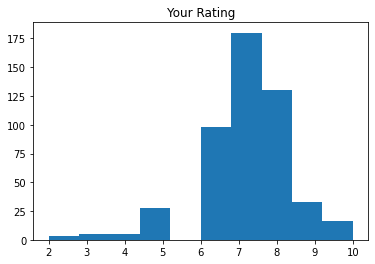

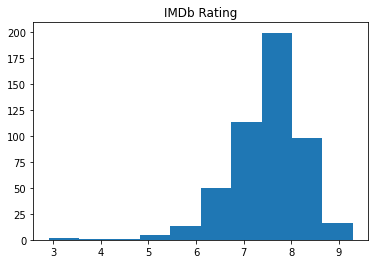

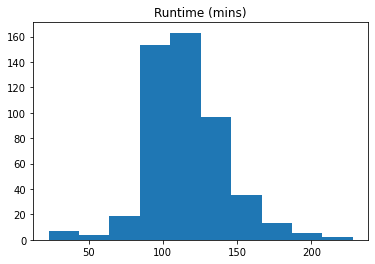

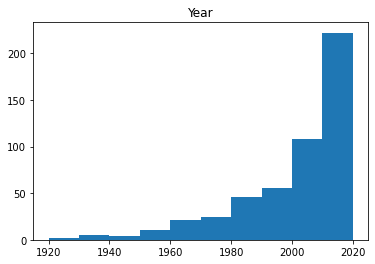

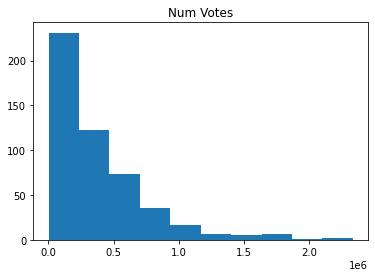

In [9]:
# Plot distributions for all numeric variables 
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

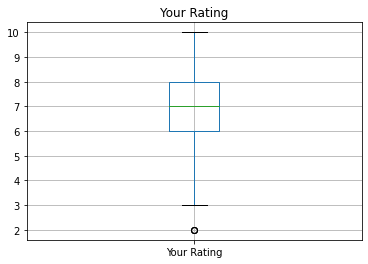

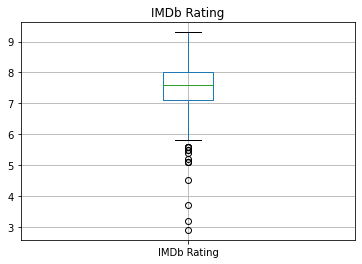

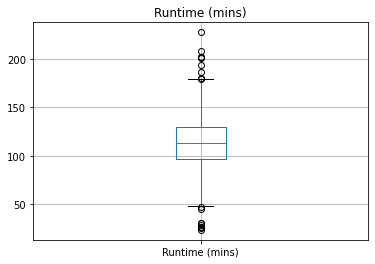

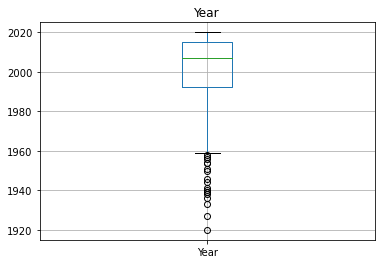

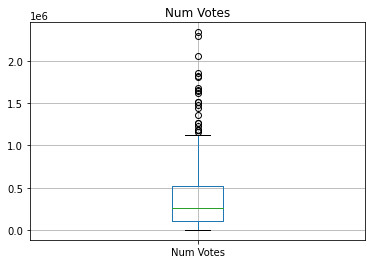

In [10]:
# Look at box plots to see outliers
for col in df_num.columns:
    df_num.boxplot(column=col)
    plt.title(col)
    plt.show()

## Observations about distributions of numeric predictors
* Num Votes is skewed right
* Year is skewed left
* There are outliers in all columns

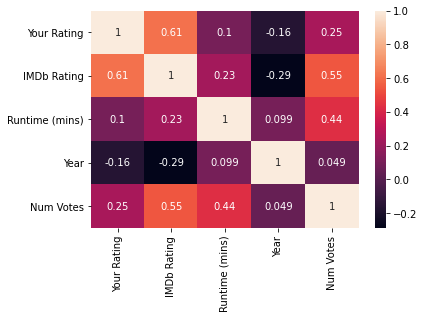

In [11]:
sns.heatmap(df_num.corr(), annot=True)

# Observations on Correlation Plot
* IMDb Rating and Num Votes are confounding variables since the rating is calculated based on the number of votes
* The strongest correlation is 0.61 between 'Your Rating' and 'IMDb Rating' 
* There is not a very strong correlation between any of these variables and 'Your Rating'

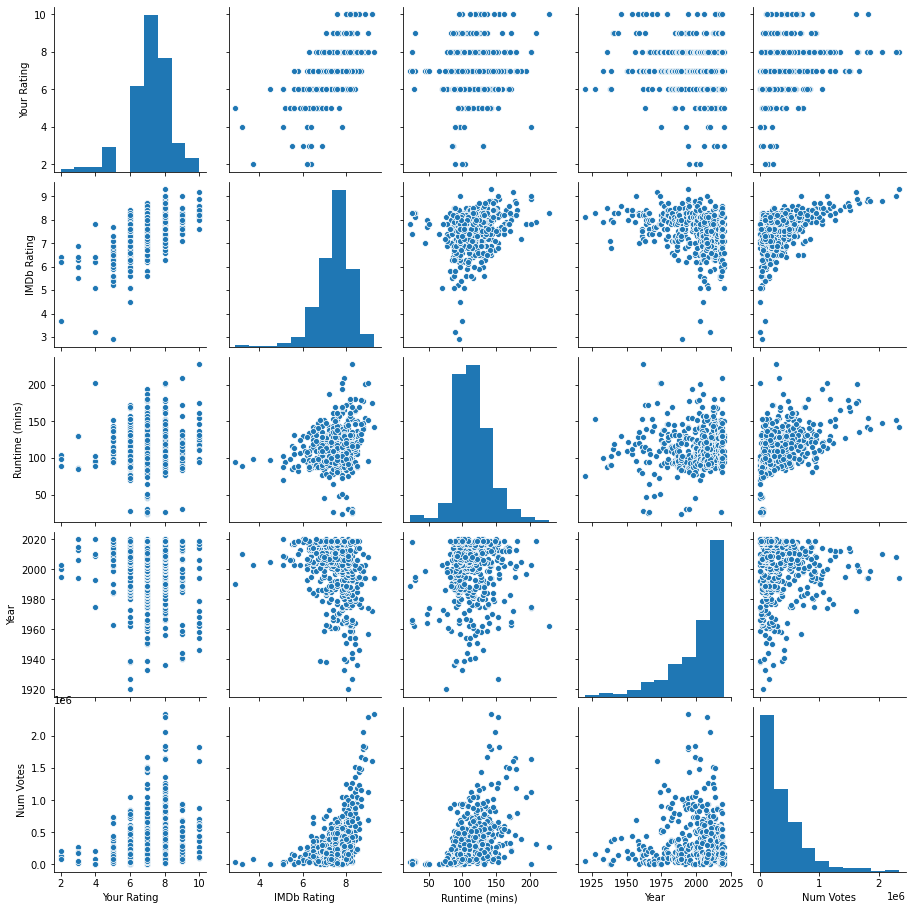

In [12]:
sns.pairplot(df_num)

In [13]:
# compare 
pd.pivot_table(all_data, index = 'Your Rating', values = ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes'])

,IMDb Rating,Num Votes,Runtime (mins),Year
Your Rating,,,,
2,5.433333,142889.666667,97.333333,1999.333333
3,6.220000,142966.800000,112.200000,2009.600000
4,5.740000,59971.800000,117.000000,2001.400000
5,6.300000,213333.000000,116.071429,2008.250000
6,7.071429,265366.724490,111.959184,2003.489796
7,7.582222,374196.716667,113.788889,2000.444444
8,7.840769,487853.930769,116.269231,2001.800000
9,7.987879,364345.909091,115.393939,1994.272727
10,8.368750,610747.937500,135.812500,1984.250000


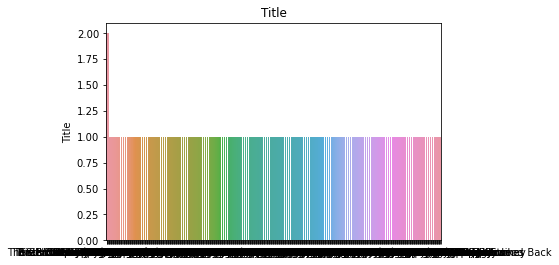

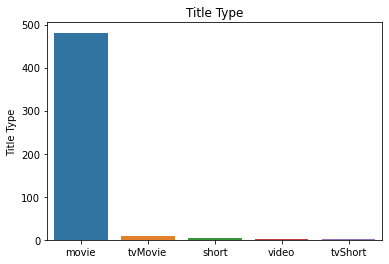

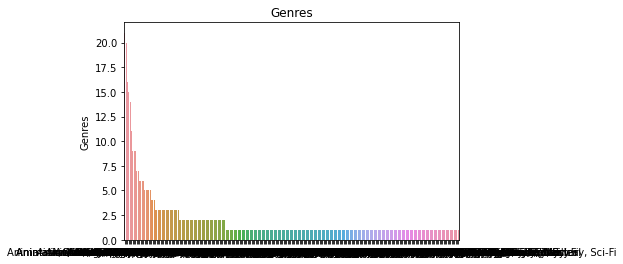

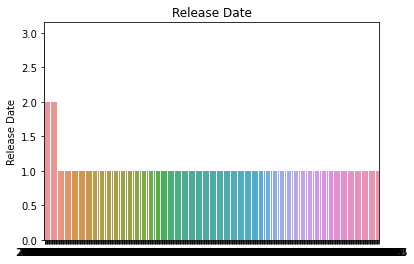

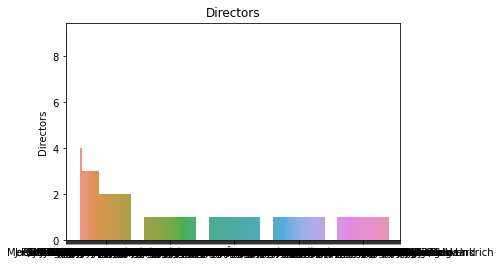

In [14]:
# Plot bar charts for all categorical data
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

## What directors do I watch the most?

Wes Anderson             9
Quentin Tarantino        9
Martin Scorsese          8
Steven Spielberg         8
Joel Coen, Ethan Coen    8
Christopher Nolan        8
Peter Jackson            7
George Lucas             5
Edgar Wright             5
Rian Johnson             5
David Fincher            5
Alfred Hitchcock         4
Paul Thomas Anderson     4
James Cameron            4
Taika Waititi            4
Bong Joon Ho             4
Chris Columbus           4
Sam Mendes               3
Steven Soderbergh        3
Robert Zemeckis          3
Name: Directors, dtype: int64


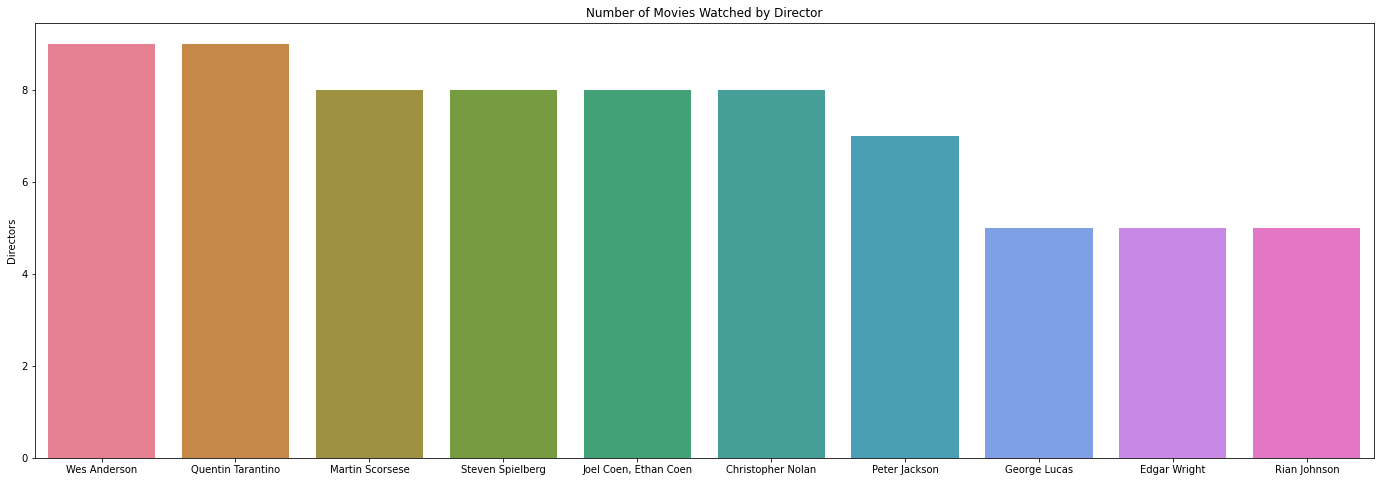

In [15]:
print(all_data.Directors.value_counts()[0:20])
fig, ax = plt.subplots(figsize=(24, 8))
plt.title('Number of Movies Watched by Director')
sns.barplot(all_data.Directors.value_counts()[0:10].index,all_data.Directors.value_counts()[0:10], palette="husl")

## Observations based on categorical variables
* Release Dates will need to be broken down to month
* Is there any useful information to get from Title or Director? For simplicity these should probably be dropped since they are unique for almost every movie
* Genre's need to be separated since there are multiple listed for each movie
* Title type is "Movie" for almost all the data

Text(0.5, 1.0, 'Month')

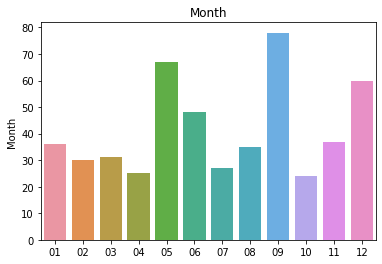

In [16]:
# How are the movies I watch release dates distributed over the months of a year
all_data['Month'] = all_data['Release Date'].apply(lambda x: 0 if pd.isna(x) else x.split('-')[1])
sns.barplot(all_data['Month'].value_counts().index,all_data['Month'].value_counts()).set_title('Month')

In [17]:
#Create dummies for genres
all_data.Genres = all_data.Genres.str.replace(' ', '') #get rid of spaces so we can use comma separator
genre_dummies = all_data['Genres'].str.get_dummies(sep=',')
print(genre_dummies)

     Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0         0          0          0          0       0      0            0   
1         0          0          1          0       0      0            0   
2         0          0          0          0       1      0            0   
3         0          0          0          0       1      0            0   
4         0          0          0          1       0      0            0   
..      ...        ...        ...        ...     ...    ...          ...   
494       0          0          1          0       0      0            0   
495       0          0          0          0       1      0            0   
496       0          0          0          1       0      1            0   
497       0          0          0          1       0      1            0   
498       0          0          0          0       1      0            0   

     Drama  Family  Fantasy  ...  Music  Musical  Mystery  Romance  Sci-Fi  \
0        

In [18]:
# See what different genre's we have
print(genre_dummies.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


## What genres do I watch the most?

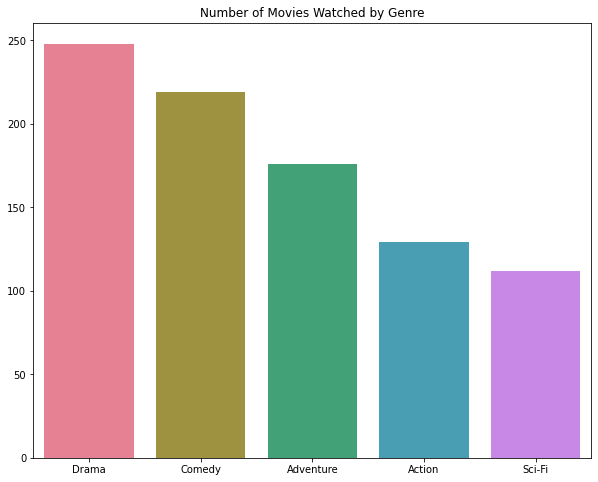

In [19]:
x,y=[],[]
for col in genre_dummies.columns:
    x.append(col)
    y.append(genre_dummies[col].sum())
count, genre = [],[]
for y, x in sorted(zip(y, x),reverse=True):
    genre.append(x)
    count.append(y)
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Number of Movies Watched by Genre')
sns.barplot(genre[0:5],count[0:5], palette="husl")


# Data preprocessing
* Get dummies for categorical variables
* Normalize Num Votes and Year which are skewed
* Standardize all numeric data
* Split data into test and train

In [20]:
cleaned_data = all_data[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Month']]

In [21]:
cleaned_data = pd.concat([cleaned_data, genre_dummies], axis=1)
print(cleaned_data)

     IMDb Rating  Runtime (mins)  Year  Num Votes Month  Action  Adventure  \
0            8.0             120  2008     797634    08       0          0   
1            8.0              84  1991     416657    09       0          0   
2            6.0             130  2020      19015    12       0          0   
3            7.0             106  2009     133713    09       0          0   
4            7.5             128  2014      86146    11       0          0   
..           ...             ...   ...        ...   ...     ...        ...   
494          7.6              81  2019      26367    05       0          0   
495          7.3             100  1989      82667    04       0          0   
496          8.2             180  2013    1181559    12       0          0   
497          8.7             146  1990    1017747    09       0          0   
498          7.6             103  1990     487696    11       0          0   

     Animation  Biography  Comedy  ...  Music  Musical  Mystery

In [22]:
all_dummies = pd.get_dummies(cleaned_data)
print(all_dummies)

     IMDb Rating  Runtime (mins)  Year  Num Votes  Action  Adventure  \
0            8.0             120  2008     797634       0          0   
1            8.0              84  1991     416657       0          0   
2            6.0             130  2020      19015       0          0   
3            7.0             106  2009     133713       0          0   
4            7.5             128  2014      86146       0          0   
..           ...             ...   ...        ...     ...        ...   
494          7.6              81  2019      26367       0          0   
495          7.3             100  1989      82667       0          0   
496          8.2             180  2013    1181559       0          0   
497          8.7             146  1990    1017747       0          0   
498          7.6             103  1990     487696       0          0   

     Animation  Biography  Comedy  Crime  ...  Month_03  Month_04  Month_05  \
0            0          0       0      0  ...         0 

Text(0.5, 1.0, 'Num Votes after Normalization')

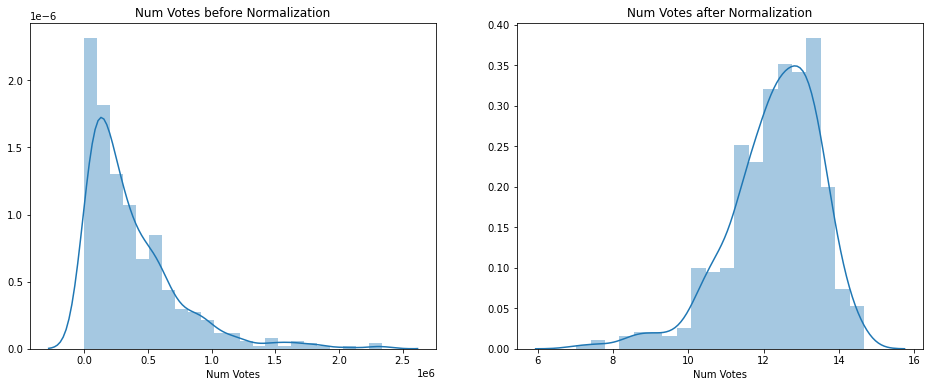

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
log_votes = np.log(all_data['Num Votes']+1)
sns.distplot(log_votes,ax=ax[1])
sns.distplot(all_data['Num Votes'],ax=ax[0])
ax[0].set_title('Num Votes before Normalization')
ax[1].set_title('Num Votes after Normalization')

0      12
1      29
2       0
3      11
4       6
       ..
494     1
495    31
496     7
497    30
498    30
Name: Year, Length: 498, dtype: int64


Text(0.5, 1.0, 'Year after Normalization')

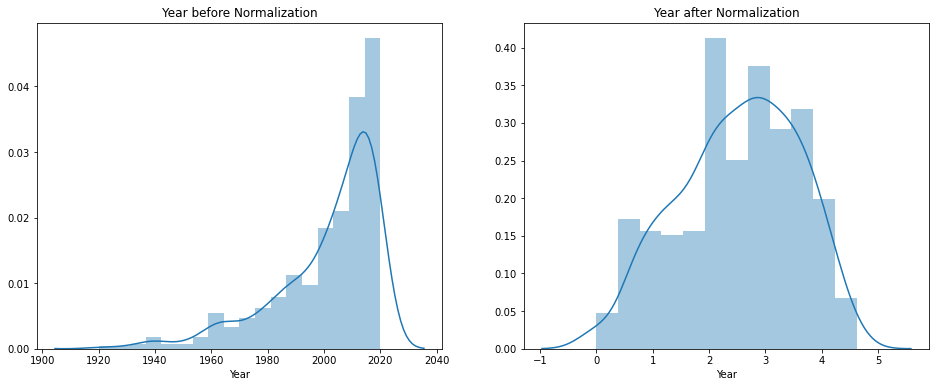

In [24]:
#To deal with negative skew, multiply by negative 1 to reflect across y-axis making the data right skewed, then shift back up to positive range by adding max year +1
#take the log to normalize
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
print((-1*all_data['Year'])+all_data['Year'].max())
log_year = np.log(-1*all_data['Year']+all_data['Year'].max()+1)
sns.distplot(log_year,ax=ax[1])
sns.distplot(all_data['Year'],ax=ax[0])

ax[0].set_title('Year before Normalization')
ax[1].set_title('Year after Normalization')

In [25]:
#Both of these log-norms look pretty good so replace the data with the log norm for num votes and year
#Leave the other two numeric variables (runtime and IMDB rating) as is, because they were already normally distributed
all_dummies['Num Votes']=log_votes
all_dummies['Year']= log_year

In [26]:
# Standardize all numeric data
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']]= scale.fit_transform(all_dummies_scaled[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']])
all_dummies_scaled


,IMDb Rating,Runtime (mins),Year,Num Votes,Action,Adventure,Animation,Biography,Comedy,Crime,...,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
0,0.647409,0.188351,0.043699,1.069283,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.647409,-1.150567,0.839045,0.535033,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.862594,0.560272,-2.395798,-2.004634,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.607592,-0.332340,-0.032429,-0.400019,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.019909,0.485888,-0.545063,-0.761718,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.145409,-1.262144,-1.736553,-1.735717,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
495,-0.231092,-0.555493,0.900427,-0.795632,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
496,0.898410,2.419880,-0.418063,1.392555,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
497,1.525911,1.155347,0.870231,1.269772,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#Split data into test and train
from sklearn.model_selection import train_test_split
X = all_dummies_scaled
y = all_data['Your Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train: ", len(X_train),"Test: ", len(X_test))

Train:  348 Test:  150


# Model Building
To start, I created each model to predict the rating. Realizing there was not enough data to predict the specific rating for more extreme values, I decided to break down the ratings into 3 categories: bad (score <=5), good (score = 6 or 7), amazing (score = 8, 9 or 10). Since these are my personal ratings, I chose the ranges based on how I usually feel about movies within each range of scores. The accuracy of each model for rating prediction and rating category prediction are shown below. More model tuning will be done in the next section to improve accuracies. 


| Model Type | Accuracy for Predicting Rating | Accuracy for Predicting Rating Category |
| --- | --- | --- |
| Naive Bayes | 0.08 | 0.14 |
| Logistic Regression | 0.42 | 0.606 |
| Decision Tree | 0.36 | 0.58 |
| K Nearest Neighbor | 0.38 | 0.64 |
| Random Forest | 0.433 | 0.586 |
| Support Vector Classifier | 0.4 | 0.613 |
| Xtreme Gradient Boosting | 0.4 | 0.606 |
| Soft Voting Classifier | 0.453 | 0.66 |

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
# Function for creating confusion matrix
# Input test = true labels of test data, pred = predicted labels for test data
def confusion(test, pred):
    labels=np.unique(np.concatenate((y_pred, y_test)))
    confusion_data = confusion_matrix(test, pred)
    heat_map = sns.heatmap(confusion_data, cmap='Blues',annot=True, linewidths=0, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.title("Confusion Matrix")
    plt.show()

In [30]:
#Naive Bayes
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))
cv = cross_val_score(gnb,X_train, y_train,cv=5)
print(cv.mean())

0.08
0.10910973084886126


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [31]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.4266666666666667


In [32]:
# Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 1)
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.32666666666666666


In [33]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.4


In [34]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.4266666666666667


In [35]:
# Support Vector Classifier
svc = SVC(probability = True)
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.42


In [36]:
# XFBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
model = xgb.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))

0.44666666666666666


0.46


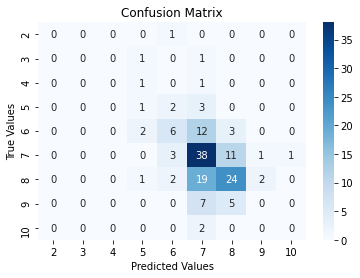

In [37]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
model = voting_clf.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
print(accuracy_score(y_test, y_pred))
confusion(y_test, y_pred)

# Observations from initial models
* The models are struggling to predict the most in classes that there is not much data for (ratings less than 5 or greater than 8)
* Because the dataset is fairly small, consider breaking predictions down by 'bad (less than 6), good (6 or 7), amazing (8, 9, or 10). Because I do not think with such small amounts of data for 2-5 and 9-10 we will be able to train a model to predict exact score accurately

In [38]:
def categorize_movie_rating(y):
    new_y=[]
    for label in y:
        if label <= 5:
            new_y.append('bad')
        elif label == 6 or label ==7:
            new_y.append('good')
        else:
            new_y.append('amazing')
    return new_y

In [39]:
y_train = categorize_movie_rating(y_train)
y_test = categorize_movie_rating(y_test)

In [40]:
#Naive Bayes
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.14


In [41]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6066666666666667


In [42]:
# Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 1)
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.58


In [43]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.64


In [44]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5866666666666667


In [45]:
# Support Vector Classifier
svc = SVC(probability = True)
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6133333333333333


In [46]:
# XFBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
model = xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6066666666666667


0.66


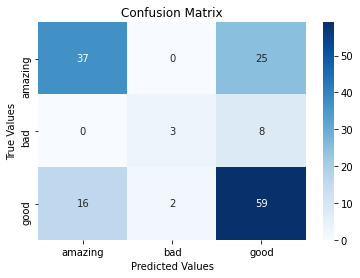

In [47]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
model = voting_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion(y_test, y_pred)

# Model Tuning
Tuning the models that performed best in the initial model testing using the categorized ratings.

| Model Type | Baseline Accuracy | Tuned Accuracy |
| --- | --- | --- |
| Naive Bayes | 0.14 | N/A |
| Logistic Regression | 0.606 | 0.633 |
| Decision Tree | 0.58 | N/A |
| K Nearest Neighbor | 0.64 | 0.66 |
| Random Forest | 0.586 | N/A |
| Support Vector Classifier | 0.613 | 0.633 |
| Xtreme Gradient Boosting | 0.606 | 0.66 |
| Voting Classifier | 0.66 | 0.693 |


In [48]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [49]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
best_lr = GridSearchCV(lr, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
best_lr = best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.6333333333333333


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.3s finished


In [50]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
best_knn = GridSearchCV(knn, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
best_knn = best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.66


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.9s finished


In [51]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
best_svc = GridSearchCV(svc, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
best_svc = best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 55 candidates, totalling 110 fits
0.6333333333333333


[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   11.2s finished


In [55]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
best_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 2, verbose = True, n_jobs = -1)
best_xgb = best_xgb.fit(X_train,y_train)
y_pred = best_xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1900 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.3min finished


0.66


# Voting Classifier

In [56]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('xgb',best_xgb)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('xgb',best_xgb)], voting = 'soft') 

voting_clf_hard_all = VotingClassifier(estimators = [('knn',best_knn),('xgb',best_xgb),('svc',best_svc), ('lr', best_lr)], voting = 'hard') 
voting_clf_soft_all = VotingClassifier(estimators = [('knn',best_knn),('xgb',best_xgb),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 

voting_clf_hard = voting_clf_hard.fit(X_train, y_train)
voting_clf_hard_pred = voting_clf_hard.predict(X_test)
print("voting_clf_hard",accuracy_score(y_test, voting_clf_hard_pred))

voting_clf_soft = voting_clf_soft.fit(X_train, y_train)
voting_clf_soft_pred = voting_clf_soft.predict(X_test)
print("voting_clf_soft",accuracy_score(y_test, voting_clf_soft_pred))

voting_clf_hard_all = voting_clf_hard_all.fit(X_train, y_train)
voting_clf_hard_all_pred = voting_clf_hard_all.predict(X_test)
print("voting_clf_hard_all",accuracy_score(y_test, voting_clf_hard_all_pred))

voting_clf_soft_all = voting_clf_soft_all.fit(X_train, y_train)
voting_clf_soft_all_pred = voting_clf_soft_all.predict(X_test)
print("voting_clf_soft_all",accuracy_score(y_test, voting_clf_soft_all_pred))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1900 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.2min finished


voting_clf_hard 0.68
Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.1min finished


voting_clf_soft 0.68
Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 902 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.1min finished


Fitting 2 folds for each of 55 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


voting_clf_hard_all 0.6733333333333333
Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1674 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.3min finished


Fitting 2 folds for each of 55 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 40 candidates, totalling 80 fits
voting_clf_soft_all 0.66


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished


In [54]:
params = {'weights' : [[1,1],[1,2],[2,1]]}

vote_weight = GridSearchCV(voting_clf_hard, param_grid = params, cv = 2, verbose = True, n_jobs = -1)

best_vote = vote_weight.fit(X_train,y_train)
y_pred = best_vote.predict(X_test)
print(accuracy_score(y_test, y_pred))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 10.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1894 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.3min finished


0.6266666666666667
